In [2]:
import numpy as np
import matplotlib.pyplot as plt

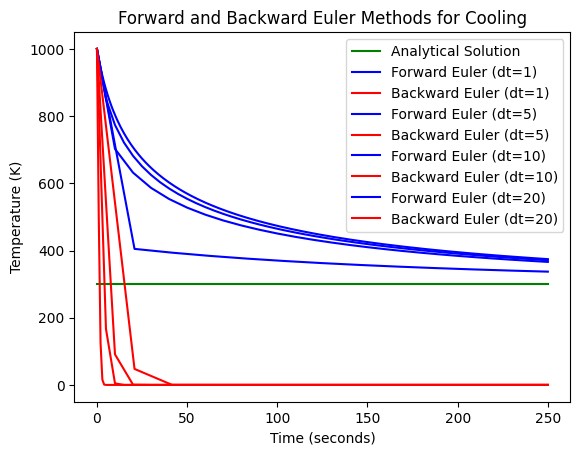

In [15]:
# Heat loss function
def heat_loss(T):
    return -3e-11*(T**4 - 300**4)

def analytical_solution(t):
    constant = ((1 / 300**3) - (1 / 1000**3))**(-1/3)
    return (constant + 300**3)**(1/3)

# Forward Euler method
def forward_euler(T0, max_t, h):
    iter = int(max_t / h) + 1
    T_values = [T0]
    for _ in range(iter - 1):
        T_values.append(T_values[-1] + h * heat_loss(T_values[-1]))
    return T_values

# Backward Euler Method
def backward_euler(T0, max_t, h):
    iter = int(max_t / h) + 1
    T_values = [T0]
    for i in range(iter - 1):
        T_values.append(T_values[-1] + h * heat_loss(T_values[-1]))
    return T_values


# parameters
max_t = 250
step_sizes = [1, 5, 10, 20]
T0 = 1000

# Plotting the analytical solution
time_points = np.linspace(0, max_t, int(max_t) + 1)  # Define fine-grained time points for the plot
T_analytical_constant = np.full_like(time_points, 300)  # Filling array with the constant equilibrium temperature value
plt.plot(time_points, T_analytical_constant, label="Analytical Solution", color='green')


for h in step_sizes:

    # For computing time points
    time_points = np.linspace(0, max_t, int(max_t / h) + 1)

    # Forward Euler method
    T_forward = forward_euler(T0, max_t, h)
    plt.plot(time_points, T_forward, label=f"Forward Euler (dt={h})", color='blue')

    # Backward Euler method
    T_backward = backward_euler(T0, max_t, h)
    plt.plot(time_points, T_backward, label=f"Backward Euler (dt={h})", color='red')


plt.xlabel('Time (seconds)')
plt.ylabel('Temperature (K)')
plt.title('Forward and Backward Euler Methods for Cooling')
plt.legend()
plt.show()



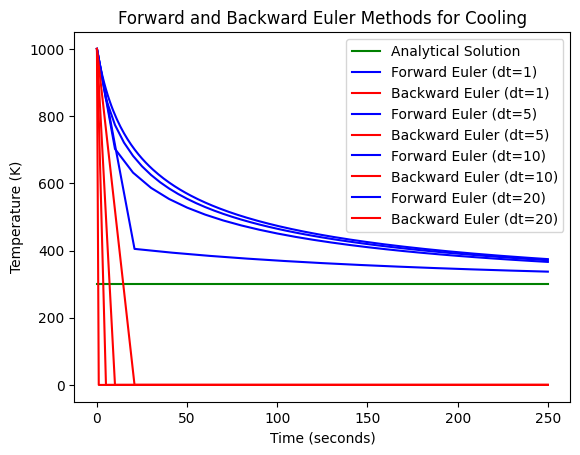

In [20]:
# Heat loss function
def heat_loss(T):
    return -3e-11*(T**4 - 300**4)

def analytical_solution(t):
    constant = ((1 / 300**3) - (1 / 1000**3))**(-1/3)
    return (constant + 300**3)**(1/3)

# Forward Euler method
def forward_euler(T0, max_t, h):
    iter = int(max_t / h) + 1
    T_values = [T0]
    for _ in range(iter - 1):
        T_values.append(T_values[-1] + h * heat_loss(T_values[-1]))
    return T_values

# Backward Euler Method
def backward_euler(T0, max_t, h, tol=1e-6, max_iter=100):
    iter = int(max_t / h) + 1
    T_values = [T0]
    for _ in range(iter - 1):
        T_curr = T_values[-1]  # Initial estimate for y_{n+1}
        for _ in range(max_iter):
            T_next = T_curr / (1 + h)  # Update equation for Backward Euler iteration
            if abs(T_next - T_curr) < tol:  # Convergence check
                break
            T_curr = T_next  # Update current estimate
        T_values.append(T_next)  # Append converged value for y_{n+1}
    return T_values


# parameters
max_t = 250
step_sizes = [1, 5, 10, 20]
T0 = 1000

# Plotting the analytical solution
time_points = np.linspace(0, max_t, int(max_t) + 1)  # Define fine-grained time points for the plot
T_analytical_constant = np.full_like(time_points, 300)  # Filling array with the constant equilibrium temperature value
plt.plot(time_points, T_analytical_constant, label="Analytical Solution", color='green')


for h in step_sizes:

    # For computing time points
    time_points = np.linspace(0, max_t, int(max_t / h) + 1)

    # Forward Euler method
    T_forward = forward_euler(T0, max_t, h)
    plt.plot(time_points, T_forward, label=f"Forward Euler (dt={h})", color='blue')

    # Backward Euler method
    T_backward = backward_euler(T0, max_t, h)
    plt.plot(time_points, T_backward, label=f"Backward Euler (dt={h})", color='red')


plt.xlabel('Time (seconds)')
plt.ylabel('Temperature (K)')
plt.title('Forward and Backward Euler Methods for Cooling')
plt.legend()
plt.show()



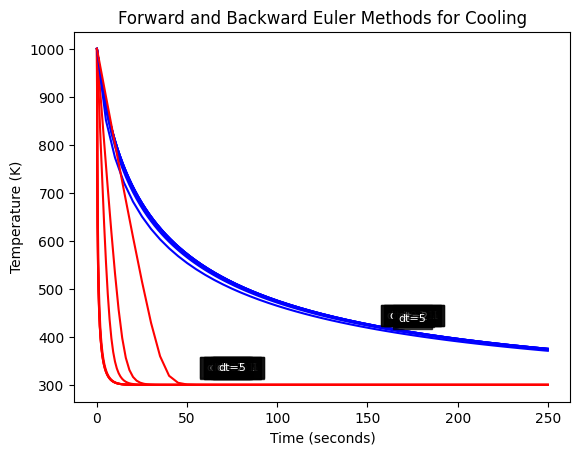

In [48]:
# Heat loss function
def heat_loss(T):
    return -3e-11*(T**4 - 300**4)

def equilibrium_temp():
    return (300 ** 4) ** (1/4)

# Forward Euler method
def forward_euler(T0, max_t, h):
    iter = int(max_t / h) + 1
    T_values = [T0]
    for _ in range(iter - 1):
        T_values.append(T_values[-1] + h * heat_loss(T_values[-1]))
    return T_values

# Backward Euler Method
def backward_euler(T0, max_t, h, tol=1e-6, max_iter=100):
    iter = int(max_t / h) + 1
    T_values = [T0]
    for _ in range(iter - 1):
        T_curr = T_values[-1]  # Initial estimate for T at next time step
        for _ in range(max_iter):
            f = lambda T: T - T_curr - h * heat_loss(T)  # Function to find root for next temperature
            f_prime = lambda T: 1 - h * heat_loss(T)  # Derivative of the function

            T_next = T_curr - f(T_curr) / f_prime(T_curr)  # Newton-Raphson update equation
            if abs(T_next - T_curr) < tol:  # Convergence check
                break
            T_curr = T_next  # Update current estimate
        T_values.append(T_next)  # Append converged value for T at next time step
    return T_values


# parameters
max_t = 250
step_sizes = [0.005, 0.001, 0.05, 0.01, 1, 2, 5]
T0 = 1000
T_eq = equilibrium_temp()

for h in step_sizes:
    # For computing time points
    time_points = np.linspace(0, max_t, int(max_t / h) + 1)

    # Forward Euler method
    T_forward = forward_euler(T0, max_t, h)
    plt.plot(time_points, T_forward, label=f"Forward Euler (dt={h})", color='blue')

    # Backward Euler method
    T_backward = backward_euler(T0, max_t, h)
    plt.plot(time_points, T_backward, label=f"Backward Euler (dt={h})", color='red')

    # Adding annotations for Forward Euler
    idx_forward = int(len(time_points) * 0.7)
    plt.annotate(f"dt={h}", (time_points[idx_forward], T_forward[idx_forward]), textcoords="offset points", xytext=(0, 10),
                 ha='center', color='white', fontsize=8, bbox=dict(facecolor='black', alpha=0.7))

    # Adding annotations for Backward Euler
    idx_backward = int(len(time_points) * 0.3)
    plt.annotate(f"dt={h}", (time_points[idx_backward], T_backward[idx_backward]), textcoords="offset points", xytext=(0, 10),
                 ha='center', color='white', fontsize=8, bbox=dict(facecolor='black', alpha=0.7))

# Plotting the analytical solution
time_points = np.linspace(0, max_t, int(max_t) + 1)  # Define fine-grained time points for the plot
T_eq_values = np.full_like(time_points, T_eq)
plt.plot(time_points, T_eq_values, label="Equilibrium Temperature", color='green')


plt.xlabel('Time (seconds)')
plt.ylabel('Temperature (K)')
plt.title('Forward and Backward Euler Methods for Cooling')
plt.show()



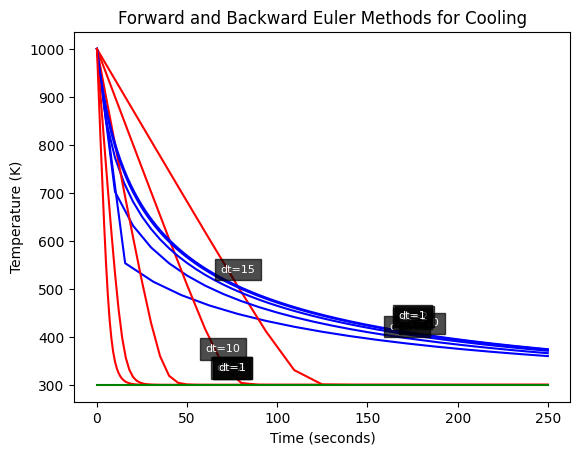

In [25]:
# Heat loss function
def heat_loss(T):
    return -3e-11*(T**4 - 300**4)

def equilibrium_temp():
    return (300 ** 4) ** (1/4)

# Forward Euler method
def forward_euler(T0, max_t, h):
    iter = int(max_t / h) + 1
    T_values = [T0]
    for _ in range(iter - 1):
        T_values.append(T_values[-1] + h * heat_loss(T_values[-1]))
    return T_values

# Backward Euler Method
def backward_euler(T0, max_t, h, tol=1e-6, max_iter=100):
    iter = int(max_t / h) + 1
    T_values = [T0]
    for _ in range(iter - 1):
        T_curr = T_values[-1]  # Initial estimate for T at next time step
        for _ in range(max_iter):
            f = lambda T: T - T_curr - h * heat_loss(T)  # Function to find root for next temperature
            f_prime = lambda T: 1 - h * heat_loss(T)  # Derivative of the function

            T_next = T_curr - f(T_curr) / f_prime(T_curr)  # Newton-Raphson update equation
            if abs(T_next - T_curr) < tol:  # Convergence check
                break
            T_curr = T_next  # Update current estimate
        T_values.append(T_next)  # Append converged value for T at next time step
    return T_values


# parameters
max_t = 250
step_sizes = [15, 10, 5, 2, 1]
T0 = 1000
T_eq = equilibrium_temp()

for h in step_sizes:
    # For computing time points
    time_points = np.linspace(0, max_t, int(max_t / h) + 1)

    # Forward Euler method
    T_forward = forward_euler(T0, max_t, h)
    plt.plot(time_points, T_forward, label=f"Forward Euler (dt={h})", color='blue')

    # Backward Euler method
    T_backward = backward_euler(T0, max_t, h)
    plt.plot(time_points, T_backward, label=f"Backward Euler (dt={h})", color='red')

    # Adding annotations for Forward Euler
    idx_forward = int(len(time_points) * 0.7)
    plt.annotate(f"dt={h}", (time_points[idx_forward], T_forward[idx_forward]), textcoords="offset points", xytext=(0, 10),
                 ha='center', color='white', fontsize=8, bbox=dict(facecolor='black', alpha=0.7))

    # Adding annotations for Backward Euler
    idx_backward = int(len(time_points) * 0.3)
    plt.annotate(f"dt={h}", (time_points[idx_backward], T_backward[idx_backward]), textcoords="offset points", xytext=(0, 10),
                 ha='center', color='white', fontsize=8, bbox=dict(facecolor='black', alpha=0.7))

# Plotting the analytical solution
time_points = np.linspace(0, max_t, int(max_t) + 1)  # Define fine-grained time points for the plot
T_eq_values = np.full_like(time_points, T_eq)
plt.plot(time_points, T_eq_values, label="Equilibrium Temperature", color='green')


plt.xlabel('Time (seconds)')
plt.ylabel('Temperature (K)')
plt.title('Forward and Backward Euler Methods for Cooling')
plt.show()



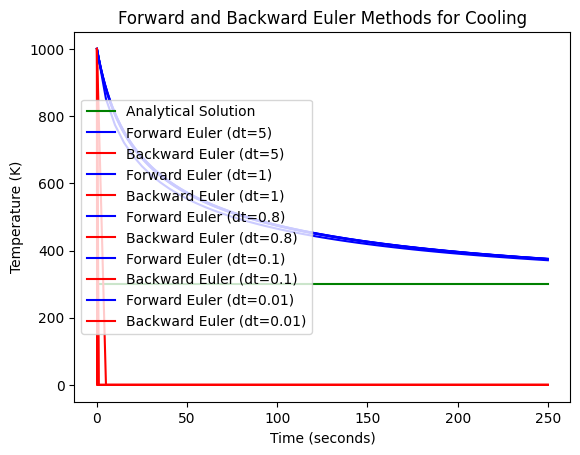

In [34]:
# Heat loss function
def heat_loss(T):
    return -3e-11*(T**4 - 300**4)

def analytical_solution(t):
    constant = ((1 / 300**3) - (1 / 1000**3))**(-1/3)
    return (constant + 300**3)**(1/3)

# Forward Euler method
def forward_euler(T0, max_t, h):
    iter = int(max_t / h) + 1
    T_values = [T0]
    for _ in range(iter - 1):
        T_values.append(T_values[-1] + h * heat_loss(T_values[-1]))
    return T_values

# Backward Euler Method
def backward_euler(T0, max_t, h, tol=1e-6, max_iter=100):
    iter = int(max_t / h) + 1
    T_values = [T0]
    for _ in range(iter - 1):
        T_curr = T_values[-1]  # Initial estimate for y_{n+1}
        for _ in range(max_iter):
            T_next = T_curr / (1 + h)  # Update equation for Backward Euler iteration
            if abs(T_next - T_curr) < tol:  # Convergence check
                break
            T_curr = T_next  # Update current estimate
        T_values.append(T_next)  # Append converged value for y_{n+1}
    return T_values


# parameters
max_t = 250
step_sizes = [5, 1, 0.80, 0.10]
T0 = 1000

# Plotting the analytical solution
time_points = np.linspace(0, max_t, int(max_t) + 1)  # Define fine-grained time points for the plot
T_analytical_constant = np.full_like(time_points, 300)  # Filling array with the constant equilibrium temperature value
plt.plot(time_points, T_analytical_constant, label="Analytical Solution", color='green')


for h in step_sizes:

    # For computing time points
    time_points = np.linspace(0, max_t, int(max_t / h) + 1)

    # Forward Euler method
    T_forward = forward_euler(T0, max_t, h)
    plt.plot(time_points, T_forward, label=f"Forward Euler (dt={h})", color='blue')

    # Backward Euler method
    T_backward = backward_euler(T0, max_t, h)
    plt.plot(time_points, T_backward, label=f"Backward Euler (dt={h})", color='red')


plt.xlabel('Time (seconds)')
plt.ylabel('Temperature (K)')
plt.title('Forward and Backward Euler Methods for Cooling')
plt.legend()
plt.show()



TypeError: unsupported operand type(s) for -: 'list' and 'list'

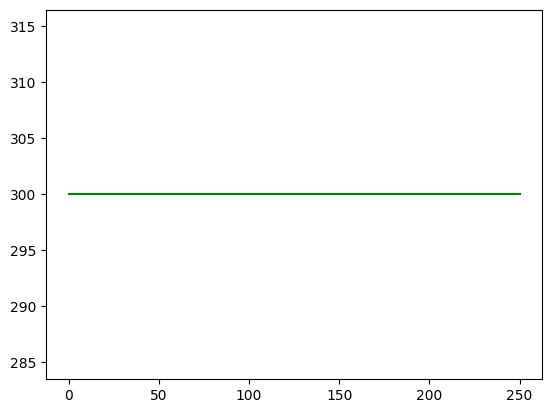

In [36]:
# Heat loss function
def heat_loss(T):
    return -3e-11*(T**4 - 300**4)

# Local truncation error calculation for Forward Euler
def local_truncation_error_forward(T, h):
    return np.abs((T[1:] - T[:-1]) / h - heat_loss(T[:-1]))
# Local truncation error calculation for Backward Euler
def local_truncation_error_backward(T, h):
    return np.abs((T[1:] - T[:-1]) / h - heat_loss(T[1:]))

# Forward Euler method
def forward_euler(T0, max_t, h):
    iter = int(max_t / h) + 1
    T_values = [T0]
    for _ in range(iter - 1):
        T_values.append(T_values[-1] + h * heat_loss(T_values[-1]))
    return T_values

# Backward Euler Method
def backward_euler(T0, max_t, h, tol=1e-6, max_iter=100):
    iter = int(max_t / h) + 1
    T_values = [T0]
    for _ in range(iter - 1):
        T_curr = T_values[-1]  # Initial estimate for y_{n+1}
        for _ in range(max_iter):
            T_next = T_curr / (1 + h)  # Update equation for Backward Euler iteration
            if abs(T_next - T_curr) < tol:  # Convergence check
                break
            T_curr = T_next  # Update current estimate
        T_values.append(T_next)  # Append converged value for y_{n+1}
    return T_values

# parameters
max_t = 250
step_sizes = [5, 1, 0.80, 0.10]
T0 = 1000

# Plotting the analytical solution
time_points = np.linspace(0, max_t, int(max_t) + 1)  # Define fine-grained time points for the plot
T_analytical_constant = np.full_like(time_points, 300)  # Filling array with the constant equilibrium temperature value
plt.plot(time_points, T_analytical_constant, label="Analytical Solution", color='green')

for h in step_sizes:

    # For computing time points
    time_points = np.linspace(0, max_t, int(max_t / h) + 1)

    # Forward Euler method
    T_forward = forward_euler(T0, max_t, h)
    LTE_forward = local_truncation_error_forward(T_forward, h)
    plt.plot(time_points, T_forward, label=f"Forward Euler (dt={h})", color='blue')

    # Backward Euler method
    T_backward = backward_euler(T0, max_t, h)
    LTE_backward = local_truncation_error_backward(T_backward, h)
    plt.plot(time_points, T_backward, label=f"Backward Euler (dt={h})", color='red')

    # Plotting local truncation errors
    plt.figure()
    plt.plot(time_points[:-1], LTE_forward, label=f"LTE Forward Euler (dt={h})", color='blue')
    plt.plot(time_points[:-1], LTE_backward, label=f"LTE Backward Euler (dt={h})", color='red')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Local Truncation Error')
    plt.title(f'Local Truncation Error for Forward and Backward Euler (dt={h})')
    plt.legend()
    plt.show()


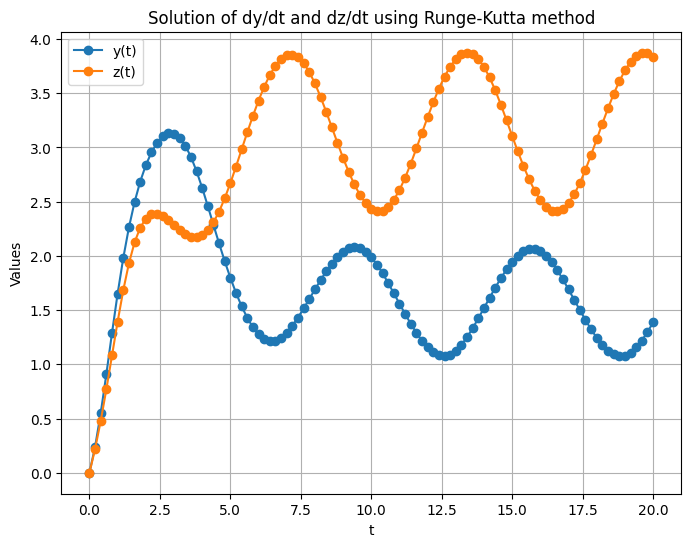

In [26]:
# Define function y
def y_function(t, y, z):
    return np.sin(t) + np.cos(y) + np.sin(z)

# Define function z
def z_function(t, z):
    return np.cos(t) + np.sin(z)

# Fourth-order Runge-Kutta method
def runge_kutta(funcy, funcz, t_span, y0, z0, num_intervals):
    h = (t_span[1] - t_span[0]) / num_intervals
    t_values = np.linspace(t_span[0], t_span[1], num_intervals + 1)
    y_values = [y0]
    z_values = [z0]

    for i in range(num_intervals):
        k1_y = h * funcy(t_values[i], y_values[i], z_values[i])
        k1_z = h * funcz(t_values[i], z_values[i])

        k2_y = h * funcy(t_values[i] + (h/2), y_values[i] + k1_y / 2, z_values[i] + k1_z / 2)
        k2_z = h * funcz(t_values[i] + (h/2), z_values[i] + k1_z / 2)

        k3_y = h * funcy(t_values[i] + h / 2, y_values[i] + k2_y / 2, z_values[i] + k2_z / 2)
        k3_z = h * funcz(t_values[i] + h / 2,  z_values[i] + k2_z / 2)

        k4_y = h * funcy(t_values[i] + h, y_values[i] + k3_y, z_values[i] + k3_z)
        k4_z = h * funcz(t_values[i] + h, z_values[i] + k3_z)

        y_values.append(y_values[i] + (k1_y + 2 * k2_y + 2 * k3_y + k4_y) / 6)
        z_values.append(z_values[i] + (k1_z + 2 * k2_z + 2 * k3_z + k4_z) / 6)

    return t_values, y_values, z_values


# parameters
t_span = [0, 20]
num_intervals = 100
y0 = 0  # Initial value for y
z0 = 0  # Initial value for z

# Solve using Fourth-order Runge-Kutta method
t_values, y_values, z_values = runge_kutta(y_function, z_function, t_span, y0, z0, num_intervals)

plt.figure(figsize=(8, 6))

# Plot numerical approximations for both function y and z
plt.plot(t_values, y_values, label='y(t)', marker='o', linestyle='-')
plt.plot(t_values, z_values, label='z(t)', marker='o', linestyle='-')

plt.xlabel('t')
plt.ylabel('Values')
plt.title('Solution of dy/dt and dz/dt using Runge-Kutta method')
plt.legend()
plt.grid(True)
plt.show()

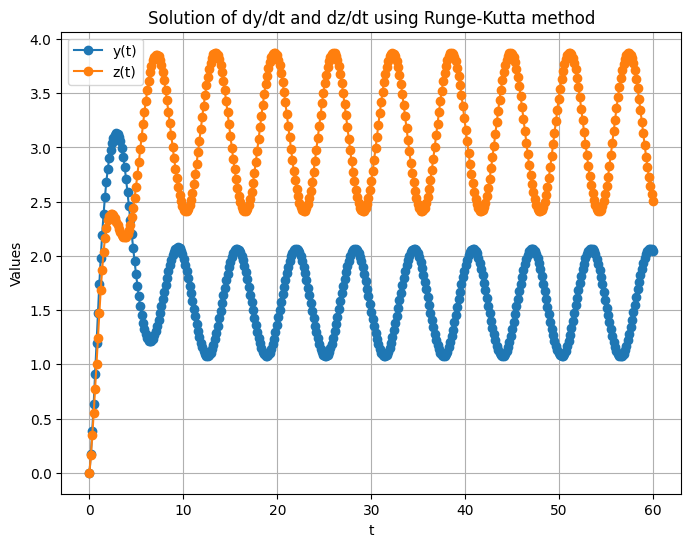

In [27]:

def y_function(t, y, z):
    return np.sin(t) + np.cos(y) + np.sin(z)

def z_function(t, z):
    return np.cos(t) + np.sin(z)

# Fourth-order Runge-Kutta method
def runge_kutta(funcy, funcz, t_span, y0, z0, num_intervals):
    h = (t_span[1] - t_span[0]) / num_intervals
    t_values = np.linspace(t_span[0], t_span[1], num_intervals + 1)
    y_values = [y0]
    z_values = [z0]

    for i in range(num_intervals):
        k1_y = h * funcy(t_values[i], y_values[i], z_values[i])
        k1_z = h * funcz(t_values[i], z_values[i])

        k2_y = h * funcy(t_values[i] + (h/2), y_values[i] + k1_y / 2, z_values[i] + k1_z / 2)
        k2_z = h * funcz(t_values[i] + (h/2), z_values[i] + k1_z / 2)

        k3_y = h * funcy(t_values[i] + h / 2, y_values[i] + k2_y / 2, z_values[i] + k2_z / 2)
        k3_z = h * funcz(t_values[i] + h / 2,  z_values[i] + k2_z / 2)

        k4_y = h * funcy(t_values[i] + h, y_values[i] + k3_y, z_values[i] + k3_z)
        k4_z = h * funcz(t_values[i] + h, z_values[i] + k3_z)

        y_values.append(y_values[i] + (k1_y + 2 * k2_y + 2 * k3_y + k4_y) / 6)
        z_values.append(z_values[i] + (k1_z + 2 * k2_z + 2 * k3_z + k4_z) / 6)

    return t_values, y_values, z_values


# Setting up parameters
t_span = [0, 60]
num_intervals = 400
y0 = 0  # Initial value for y
z0 = 0  # Initial value for z

# Solve using Runge-Kutta method
t_values, y_values, z_values = runge_kutta(y_function, z_function, t_span, y0, z0, num_intervals)

plt.figure(figsize=(8, 6))

# Plot numerical approximations with point dots
plt.plot(t_values, y_values, label='y(t)', marker='o', linestyle='-')
plt.plot(t_values, z_values, label='z(t)', marker='o', linestyle='-')

plt.xlabel('t')
plt.ylabel('Values')
plt.title('Solution of dy/dt and dz/dt using Runge-Kutta method')
plt.legend()
plt.grid(True)
plt.show()

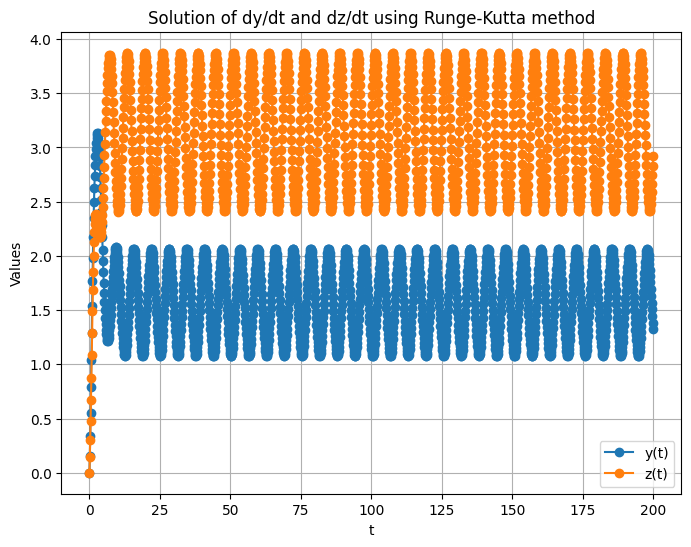

In [31]:

def y_function(t, y, z):
    return np.sin(t) + np.cos(y) + np.sin(z)

def z_function(t, z):
    return np.cos(t) + np.sin(z)

# Fourth-order Runge-Kutta method
def runge_kutta(funcy, funcz, t_span, y0, z0, num_intervals):
    h = (t_span[1] - t_span[0]) / num_intervals
    t_values = np.linspace(t_span[0], t_span[1], num_intervals + 1)
    y_values = [y0]
    z_values = [z0]

    for i in range(num_intervals):
        k1_y = h * funcy(t_values[i], y_values[i], z_values[i])
        k1_z = h * funcz(t_values[i], z_values[i])

        k2_y = h * funcy(t_values[i] + (h/2), y_values[i] + k1_y / 2, z_values[i] + k1_z / 2)
        k2_z = h * funcz(t_values[i] + (h/2), z_values[i] + k1_z / 2)

        k3_y = h * funcy(t_values[i] + h / 2, y_values[i] + k2_y / 2, z_values[i] + k2_z / 2)
        k3_z = h * funcz(t_values[i] + h / 2,  z_values[i] + k2_z / 2)

        k4_y = h * funcy(t_values[i] + h, y_values[i] + k3_y, z_values[i] + k3_z)
        k4_z = h * funcz(t_values[i] + h, z_values[i] + k3_z)

        y_values.append(y_values[i] + (k1_y + 2 * k2_y + 2 * k3_y + k4_y) / 6)
        z_values.append(z_values[i] + (k1_z + 2 * k2_z + 2 * k3_z + k4_z) / 6)

    return t_values, y_values, z_values


# Setting up parameters
t_span = [0, 200]
num_intervals = 1500
y0 = 0  # Initial value for y
z0 = 0  # Initial value for z

# Solve using Runge-Kutta method
t_values, y_values, z_values = runge_kutta(y_function, z_function, t_span, y0, z0, num_intervals)

plt.figure(figsize=(8, 6))

# Plot numerical approximations with point dots
plt.plot(t_values, y_values, label='y(t)', marker='o', linestyle='-')
plt.plot(t_values, z_values, label='z(t)', marker='o', linestyle='-')

plt.xlabel('t')
plt.ylabel('Values')
plt.title('Solution of dy/dt and dz/dt using Runge-Kutta method')
plt.legend()
plt.grid(True)
plt.show()

Velocity within tolerance limit. Breaking...


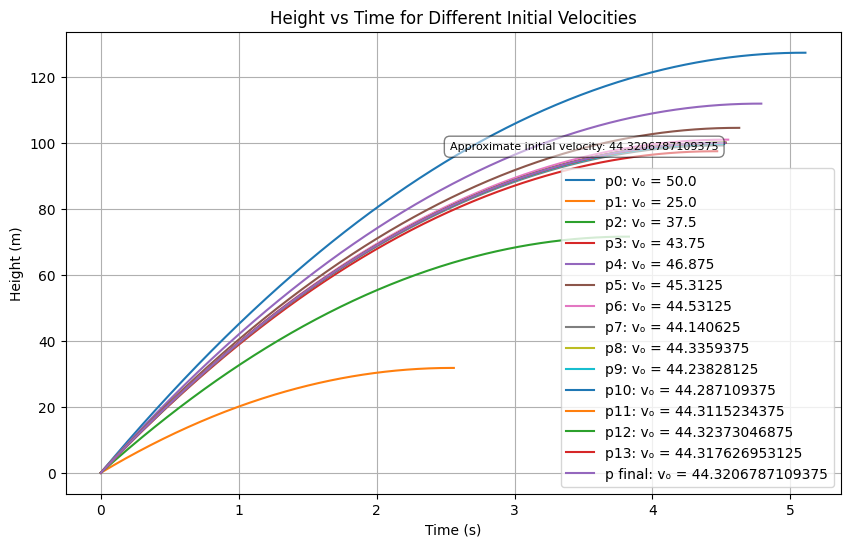

The initial velocity required for a maximum elevation of 100 meters is approximately 44.3206787109375 m/s.


In [4]:
from itertools import zip_longest

def d2y_dx2():
    return -9.8

def euler_method(dt, v0, g):
    y = 0 # initialize at y = 0
    vy = v0 # initialize velocity
    velocities = [v0]
    heights = [y]
    time = [0]

    t = 0
    while True:  # Simulate the projectile's motion
        vy = vy +  g * dt  # Update velocity using Euler's method
        y = y + vy * dt  # Update height using Euler's method
        time.append(t + dt)
        velocities.append(vy)
        heights.append(y)
        t += dt
        if vy <= 0:    
            break    # Stop the simulation at the maximum height which is if velocity is zero (vy = 0)
    
    return y, velocities, heights, time # Return maximum height is reached


def shooting_method(target_height, dt, v0_lower, v0_upper, tolerance):
    v0_mid = 0.5*(v0_lower + v0_upper)
    v_values = []
    y_values = []
    t_values = [] 
    vo_values = []

    while True:
        y, v_value, y_value, t_value = euler_method(dt, v0_mid, d2y_dx2())
        v_values.append(v_value)
        y_values.append(y_value)
        t_values.append(t_value)
        vo_values.append(v0_mid)
        if y > target_height:
            v0_upper = v0_mid
        elif target_height - tolerance <=  y <= target_height + tolerance:
            print("Velocity within tolerance limit. Breaking...")
            break
        else:
            v0_lower = v0_mid
        v0_mid = 0.5 * (v0_lower + v0_upper)

    return v0_mid, v_values, y_values, t_values, vo_values

def plot_projectile_simulation(v, y, t, vo):
    # Plotting
    plt.figure(figsize=(10, 6))
    i = 0
    for v_val, y_val, t_val, vo_val in zip_longest(v, y, t, vo, fillvalue=[]):
        if i == len(v)-1:
            plt.plot(t_val, y_val, label=f"p final: vₒ = {vo_val}")
            plt.annotate(f"Approximate initial velocity: {vo_val}", (t_val[-1], y_val[-1]), textcoords="offset points", xytext=(-5,-5), ha='right', fontsize=8, bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))
        else:
            plt.plot(t_val, y_val, label=f"p{i}: vₒ = {vo_val}")
            
        i += 1


    plt.title('Height vs Time for Different Initial Velocities')
    plt.xlabel('Time (s)')
    plt.ylabel('Height (m)')
    plt.legend()
    plt.grid(True)
    plt.show()

target_height = 100  # Target maximum elevation
dt = 0.01  # Step size for Euler's method
v0_lower_bound = 0  # Lower bound for initial velocity
v0_upper_bound = 100  # Upper bound for initial velocity
tolerance = 0.01  # Tolerance for the shooting method

initial_velocity, v_values, y_values, t_values, vo_values = shooting_method(target_height, dt, v0_lower_bound, v0_upper_bound, tolerance)
plot_projectile_simulation(v_values, y_values, t_values, vo_values)

print(f"The initial velocity required for a maximum elevation of 100 meters is approximately {initial_velocity} m/s.")



Velocity within tolerance limit. Breaking...


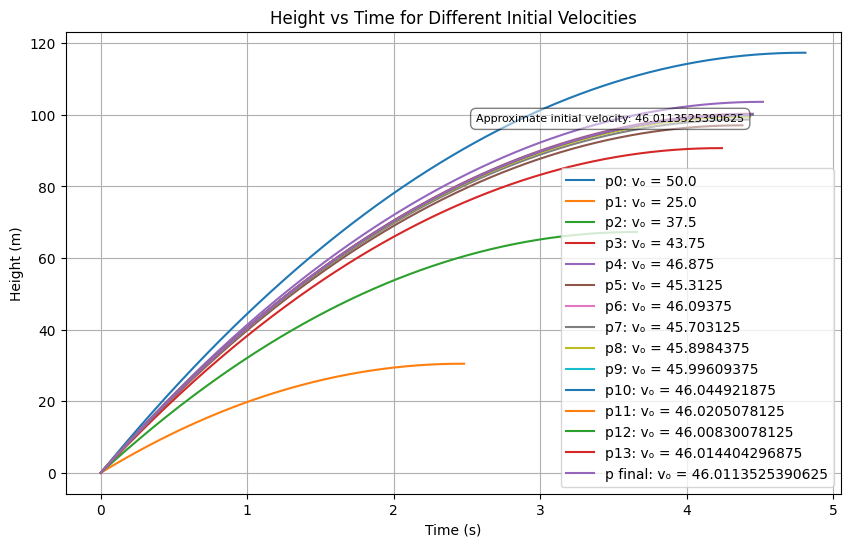

The initial velocity required for a maximum elevation of 100 meters is approximately 46.0113525390625 m/s.


In [3]:
from itertools import zip_longest

def d2y_dx2(dydx):
    return -9.8-(1/40)*dydx

def euler_method(dt, v0):
    y = 0 # initialize at y = 0
    vy = v0 # initialize velocity
    velocities = [v0]
    heights = [y]
    time = [0]

    t = 0
    while True:  # Simulate the projectile's motion
        vy = vy +  d2y_dx2(vy) * dt  # Update velocity using Euler's method
        y = y + vy * dt  # Update height using Euler's method
        time.append(t + dt)
        velocities.append(vy)
        heights.append(y)
        t += dt
        if vy <= 0:    
            break    # Stop the simulation at the maximum height which is if velocity is zero (vy = 0)
    
    return y, velocities, heights, time # Return maximum height is reached


def shooting_method(target_height, dt, v0_lower, v0_upper, tolerance):
    v0_mid = 0.5*(v0_lower + v0_upper)
    v_values = []
    y_values = []
    t_values = [] 
    vo_values = []

    while True:
        y, v_value, y_value, t_value = euler_method(dt, v0_mid)
        v_values.append(v_value)
        y_values.append(y_value)
        t_values.append(t_value)
        vo_values.append(v0_mid)
        if y > target_height:
            v0_upper = v0_mid
        elif target_height - tolerance <=  y <= target_height + tolerance:
            print("Velocity within tolerance limit. Breaking...")
            break
        else:
            v0_lower = v0_mid
        v0_mid = 0.5 * (v0_lower + v0_upper)

    return v0_mid, v_values, y_values, t_values, vo_values

def plot_projectile_simulation(v, y, t, vo):
    # Plotting
    plt.figure(figsize=(10, 6))
    i = 0
    for v_val, y_val, t_val, vo_val in zip_longest(v, y, t, vo, fillvalue=[]):
        if i == len(v)-1:
            plt.plot(t_val, y_val, label=f"p final: vₒ = {vo_val}")
            plt.annotate(f"Approximate initial velocity: {vo_val}", (t_val[-1], y_val[-1]), textcoords="offset points", xytext=(-5,-5), ha='right', fontsize=8, bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))
        else:
            plt.plot(t_val, y_val, label=f"p{i}: vₒ = {vo_val}")
            
        i += 1


    plt.title('Height vs Time for Different Initial Velocities')
    plt.xlabel('Time (s)')
    plt.ylabel('Height (m)')
    plt.legend()
    plt.grid(True)
    plt.show()

target_height = 100  # Target maximum elevation
dt = 0.01  # Step size for Euler's method
v0_lower_bound = 0  # Lower bound for initial velocity
v0_upper_bound = 100  # Upper bound for initial velocity
tolerance = 0.01  # Tolerance for the shooting method

initial_velocity, v_values, y_values, t_values, vo_values = shooting_method(target_height, dt, v0_lower_bound, v0_upper_bound, tolerance)
plot_projectile_simulation(v_values, y_values, t_values, vo_values)

print(f"The initial velocity required for a maximum elevation of 100 meters is approximately {initial_velocity} m/s.")



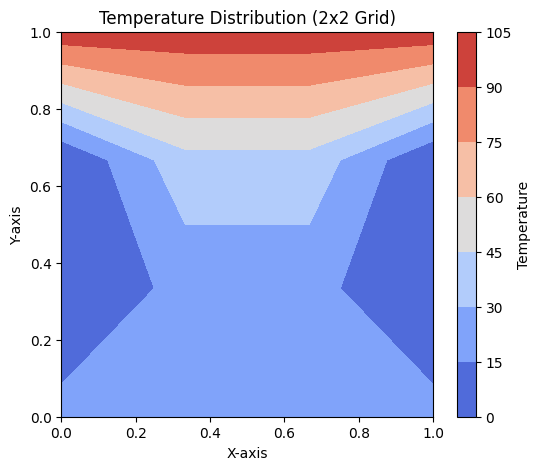

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
N = 3  # Grid size (3x3 grid: 2 internal points along x and y)
L = 1.0  # Length of the square domain

# Initialize grid and boundary conditions
T = np.zeros((N+1, N+1))  # Initialize temperature grid
T[0, :] = 20.0  # Left side boundary condition (T = 20)
T[-1, :] = 100.0  # Top and bottom side boundary conditions (T = 100)
T[:, -1] = T[:, -2]  # Right side boundary condition (dT/dx = 0)

# Perform iterations
num_iterations = 1000
for iteration in range(num_iterations):
    for i in range(1, N):  # Update interior points using finite difference method
        for j in range(1, N):
            
            T[i, j] = 0.25 * (T[i+1, j] + T[i-1, j] + T[i, j+1] + T[i, j-1])

# Visualize the temperature distribution
x = np.linspace(0, L, N+1)
y = np.linspace(0, L, N+1)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(6, 5))
plt.contourf(X, Y, T, cmap='coolwarm')
plt.colorbar(label='Temperature')
plt.title('Temperature Distribution (2x2 Grid)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(False)
plt.show()


[[100.         100.         100.          20.        ]
 [ 20.           0.           0.          46.66666667]
 [ 20.           0.           0.          73.33333333]
 [100.         100.         100.         100.        ]]
T[i, j] =  30.0
T[i, j] =  44.16666666666667
T[i, j] =  37.5
T[i, j] =  63.75000000000001
T[i, j] =  50.41666666666667
T[i, j] =  65.20833333333334
T[i, j] =  58.54166666666667
T[i, j] =  74.27083333333334
T[i, j] =  60.93750000000001
T[i, j] =  70.46875
T[i, j] =  63.802083333333336
T[i, j] =  76.90104166666667
T[i, j] =  63.567708333333336
T[i, j] =  71.78385416666667
T[i, j] =  65.1171875
T[i, j] =  77.55859375
T[i, j] =  64.22526041666667
T[i, j] =  72.11263020833334
T[i, j] =  65.44596354166667
T[i, j] =  77.72298177083334
T[i, j] =  64.3896484375
T[i, j] =  72.19482421875
T[i, j] =  65.52815755208334
T[i, j] =  77.76407877604167
T[i, j] =  64.43074544270834
T[i, j] =  72.21537272135419
T[i, j] =  65.5487060546875
T[i, j] =  77.77435302734375
T[i, j] =  64.4410196

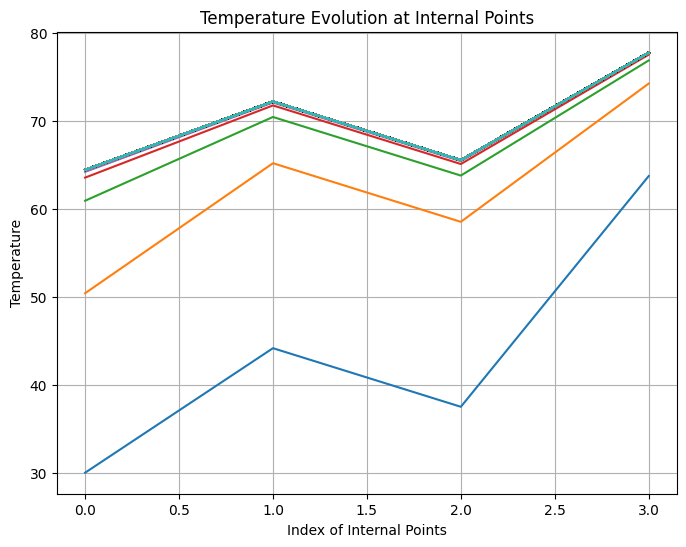

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
N = 3  # Grid size (3x3 grid: 2 internal points along x and y)
L = 1.0  # Length of the square domain

# Initialize temperature grid
T = np.zeros((N+1, N+1))  # Initialize temperature grid

# Left side boundary condition (T = 20)
T[:, 0] = 20.0  

# Top and bottom side boundary conditions (T = 100)
T[0, :] = 100.0  
T[-1, :] = 100.0  

# Right side boundary condition (dT/dx = 0)
T[:, -1] = np.linspace(20, 100, N+1)  # Linear gradient from

print(T)

# Record internal points' temperatures per iteration
internal_temps = []

# Perform iterations
num_iterations = 1000
for iteration in range(num_iterations):
    for i in range(1, N):  # Update interior points using finite difference method
        for j in range(1, N):
            T[i, j] = 0.25 * (T[i+1, j] + T[i-1, j] + T[i, j+1] + T[i, j-1])
            print("T[i, j] = ", T[i,j])
    
    # Record temperatures at internal points for this iteration
    internal_temps.append(np.copy(T[1:N, 1:N]))

# Visualize the temperature evolution at internal points
plt.figure(figsize=(8, 6))
for i, temps in enumerate(internal_temps):
    plt.plot(temps.flatten(), label=f"Iteration {i+1}")

plt.title('Temperature Evolution at Internal Points')
plt.xlabel('Index of Internal Points')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
N = 3  # Grid size (3x3 grid: 2 internal points along x and y)
L = 1.0  # Length of the square domain

# Initialize grid and boundary conditions
T = np.zeros((N+1, N+1))  # Initialize temperature grid
T[0, :] = 20.0  # Left side boundary condition (T = 20)
T[-1, :] = 100.0  # Top and bottom side boundary conditions (T = 100)
T[:, -1] = T[:, -2]  # Right side boundary condition (dT/dx = 0)
print(T)

# Record internal points' temperatures per iteration
internal_temps = []

# Perform iterations
num_iterations = 1000
for iteration in range(num_iterations):
    for i in range(1, N):  # Update interior points using finite difference method
        for j in range(1, N):
            T[i, j] = 0.25 * (T[i+1, j] + T[i-1, j] + T[i, j+1] + T[i, j-1])
            print("T[i, j] = ", T[i,j])
    
    # Record temperatures at internal points for this iteration
    internal_temps.append(np.copy(T[1:N, 1:N]))

# Visualize the temperature evolution at internal points
plt.figure(figsize=(8, 6))
for i, temps in enumerate(internal_temps):
    plt.plot(temps.flatten(), label=f"Iteration {i+1}")

plt.title('Temperature Evolution at Internal Points')
plt.xlabel('Index of Internal Points')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constants
N = 3  # Grid size (3x3 grid: 2 internal points along x and y)
L = 1.0  # Length of the square domain

# Initialize grid and boundary conditions
T = np.zeros((N+1, N+1))  # Initialize temperature grid
T[0, :] = 20.0  # Left side boundary condition (T = 20)
T[-1, :] = 100.0  # Top and bottom side boundary conditions (T = 100)
T[:, -1] = T[:, -2]  # Right side boundary condition (dT/dx = 0)

# Create a figure
fig, ax = plt.subplots(figsize=(6, 5))

# Perform iterations
num_iterations = 1000  # Reduce iterations for faster GIF generation
def update(frame):
    global T
    for i in range(1, N):  # Update interior points using finite difference method
        for j in range(1, N):
            T[i, j] = 0.25 * (T[i+1, j] + T[i-1, j] + T[i, j+1] + T[i, j-1])

    ax.clear()  # Clear the previous plot
    x = np.linspace(0, L, N+1)
    y = np.linspace(0, L, N+1)
    X, Y = np.meshgrid(x, y)
    contour = ax.contourf(X, Y, T, cmap='coolwarm')
    ax.set_title(f'Temperature Distribution (Iteration {frame})')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.grid(False)

    return contour

ani = FuncAnimation(fig, update, frames=num_iterations, interval=200, repeat=False)

# Add colorbar after creating the animation
plt.colorbar(update(0), ax=ax, label='Temperature')

ani.save('temperature_evolution.gif', writer='pillow', fps=10)
plt.close()


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constants
N = 7  # Grid size (3x3 grid: 2 internal points along x and y)
L = 1.0  # Length of the square domain

dx = L / N  # Grid spacing
dx_increment = (100 - 20) / (N - 1)  # Increment for the gradient calculation

# Initialize temperature grid
T = np.zeros((N+1, N+1))  # Initialize temperature grid

# Left side boundary condition (T = 20)
T[:, 0] = 20.0  

# Top and bottom side boundary conditions (T = 100)
T[0, :] = 100.0  
T[-1, :] = 100.0  
T[0, 0] = 20.0
T[-1, 0] = 20.0

# Right side boundary condition (dT/dx = 0)
T[:, -1] = np.linspace(20, 100 - dx_increment, N+1)  # Linear gradient from
print(T)

# Create a figure
fig, ax = plt.subplots(figsize=(6, 5))

# Perform iterations
num_iterations = 50  # Reduce iterations for faster GIF generation
def update(frame):
    global T
    for i in range(1, N):  # Update interior points using finite difference method
        for j in range(1, N):
            T[i, j] = 0.25 * (T[i+1, j] + T[i-1, j] + T[i, j+1] + T[i, j-1])

    ax.clear()  # Clear the previous plot
    x = np.linspace(0, L, N+1)
    y = np.linspace(0, L, N+1)
    X, Y = np.meshgrid(x, y)
    contour = ax.contourf(X, Y, T, cmap='coolwarm')
    ax.set_title(f'Temperature Distribution (Iteration {frame})')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.grid(False)

    return contour

ani = FuncAnimation(fig, update, frames=num_iterations, interval=200, repeat=False)

# Add colorbar after creating the animation
plt.colorbar(update(0), ax=ax, label='Temperature')

ani.save('temperature_evolution.gif', writer='pillow', fps=10)
plt.close()


[[ 20.         100.         100.         100.         100.
  100.         100.          20.        ]
 [ 20.           0.           0.           0.           0.
    0.           0.          29.52380952]
 [ 20.           0.           0.           0.           0.
    0.           0.          39.04761905]
 [ 20.           0.           0.           0.           0.
    0.           0.          48.57142857]
 [ 20.           0.           0.           0.           0.
    0.           0.          58.0952381 ]
 [ 20.           0.           0.           0.           0.
    0.           0.          67.61904762]
 [ 20.           0.           0.           0.           0.
    0.           0.          77.14285714]
 [ 20.         100.         100.         100.         100.
  100.         100.          86.66666667]]


[[ 20. 100. 100. 100.]
 [ 20.   0.   0.   0.]
 [ 20.   0.   0.   0.]
 [ 20. 100. 100. 100.]]


KeyboardInterrupt: 

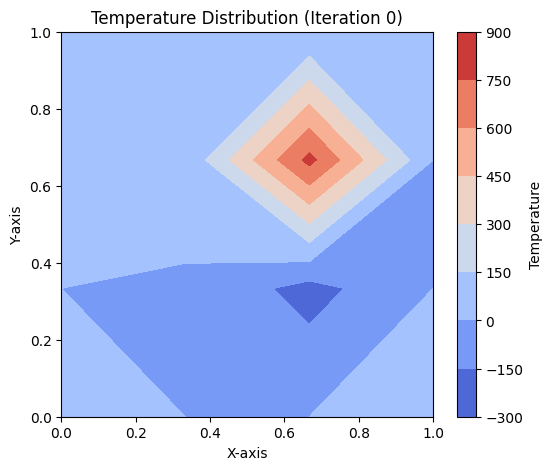

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constants
N = 3  # Grid size (3x3 grid: 2 internal points along x and y)
L = 1.0  # Length of the square domain

dx = L / N  # Grid spacing

# Initialize temperature grid
T = np.zeros((N+1, N+1))  # Initialize temperature grid

# Left side boundary condition (T = 20)
T[:, 0] = 20.0  

# Top and bottom side boundary conditions (T = 100)
T[0, :] = 100.0  
T[-1, :] = 100.0  
T[0, 0] = 20.0
T[-1, 0] = 20.0
for i in range(N+1):
    T[i, -1] = 20 + i * dx * (100 - 20) / L

print(T)

# Create a figure
fig, ax = plt.subplots(figsize=(6, 5))

# Perform iterations
num_iterations = 50  # Reduce iterations for faster GIF generation
def update(frame):
    global T
    for i in range(1, N):  # Update interior points using finite difference method
        for j in range(1, N):
            # Check for right boundary and apply Neumann boundary condition
                T[i, j] = 0.25 * (T[i+1, j] + T[i-1, j] + T[i, j+1] + T[i, j-1])

    ax.clear()  # Clear the previous plot
    x = np.linspace(0, L, N+1)
    y = np.linspace(0, L, N+1)
    X, Y = np.meshgrid(x, y)
    contour = ax.contourf(X, Y, T, cmap='coolwarm')
    ax.set_title(f'Temperature Distribution (Iteration {frame})')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.grid(False)

    return contour

ani = FuncAnimation(fig, update, frames=num_iterations, interval=200, repeat=False)

# Add colorbar after creating the animation
plt.colorbar(update(0), ax=ax, label='Temperature')

ani.save('temperature_evolution.gif', writer='pillow', fps=10)
plt.close()


In [12]:
def conjugate_gradient(A, B, x_0, max_iterations=10000, tolerance=1e-8):
    x = x_0
    r = B - np.dot(A, x)
    p = r
    rsold = np.dot(r.T, r).item()

    for i in range(max_iterations):
        Ap = np.dot(A, p)
        alpha = rsold / np.dot(p.T, Ap).item()
        x = x + alpha * p
        r = r - alpha * Ap
        rsnew = np.dot(r.T, r).item()
        
        if np.linalg.norm(r) < tolerance:
            print(f"Convergence achieved in {i+1} iterations using conjugate gradient.")
            return x
        
        beta = rsnew / rsold
        p = r + beta * p
        rsold = rsnew

    print("Maximum iterations reached without convergence.")
    return x

A = np.array([[4, -1, -1, 0, 0, 0], [-1, 4, 0, -1, 0, 0], [-1, 0, 3, -1, 0, 0], [0, -1, -1, 4, 0, -1], [0, 0, -2, -1, 4, 0], [0, 0, -1, -2, 0, 4]])
B = np.array([[120], [120], [100], [100], [100], [100]])

# Check if A is symmetric
print(np.allclose(A, A.T))

# Try different initial guesses
x_0 = np.ones_like(B)
x = conjugate_gradient(A, B, x_0)
print(x)


False
Maximum iterations reached without convergence.
[[-4.78626064e-01]
 [ 1.02780965e+03]
 [-8.94034951e+02]
 [ 6.44254919e+02]
 [-1.26278635e+02]
 [ 3.95694889e+02]]


In [13]:
def BiCGStab(A, B, x_0, max_iterations=10000, tolerance=1e-8):
    x = x_0
    r = B - np.dot(A, x)
    p = r
    r_tilde = r.copy()
    rsold = np.dot(r.T, r).item()

    for i in range(max_iterations):
        Ap = np.dot(A, p)
        alpha = rsold / np.dot(r_tilde.T, Ap).item()
        x = x + alpha * p
        r = r - alpha * Ap
        s = r.copy()

        rsnew = np.dot(r.T, r).item()
        if np.sqrt(rsnew) < tolerance:
            print(f"Convergence achieved in {i+1} iterations using BiCGStab.")
            return x
        
        beta = (rsnew / rsold) * (alpha / np.dot(r_tilde.T, s).item())
        r_tilde = r - beta * (r_tilde - np.dot(A, s))
        p = r_tilde + beta * p
        rsold = rsnew

    print("Maximum iterations reached without convergence.")
    return x

A = np.array([[4, -1, -1, 0, 0, 0], [-1, 4, 0, -1, 0, 0], [-1, 0, 3, -1, 0, 0], [0, -1, -1, 4, 0, -1], [0, 0, -2, -1, 4, 0], [0, 0, -1, -2, 0, 4]])
B = np.array([[120], [120], [100], [100], [100], [100]])


# Test BiCGStab method with your matrices
x_0 = np.ones_like(B)
x = BiCGStab(A, B, x_0)
print(x)


Convergence achieved in 97 iterations using BiCGStab.
[[68.25112107]
 [68.43049327]
 [84.57399103]
 [85.47085202]
 [88.65470852]
 [88.87892377]]


TypeError: 'numpy.ndarray' object is not callable

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
N = 3  # Grid size (3x3 grid: 2 internal points along x and y)
L = 1.0  # Length of the square domain

dx = L / N  # Grid spacing

# Initialize temperature grid
T = np.zeros((N+1, N+1))  # Initialize temperature grid

# Left side boundary condition (T = 20)
T[:, 0] = 20.0  

# Top and bottom side boundary conditions (T = 100)
T[0, :] = 100.0  
T[-1, :] = 100.0  
T[0, 0] = 20.0
T[-1, 0] = 20.0
for i in range(N+1):
    T[i, -1] = 1

print(T)

A = np.zeros((6, 6))
print(A)



TypeError: 'numpy.ndarray' object is not callable